# Basic Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings('ignore')

### Reading the csv file

In [2]:
df=pd.read_csv(r"H2HBABBA1483.csv")

### Getting insight about the data

In [3]:
#printing the first few values
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200726979,BJ'S co,2019-05-16 00:00:00,2019.0,1.929236e+09,2019-04-30,20190430,20190430,20190515.0,USD,RV,1.0,NaN,223.08,20190430.0,NAA8,1.929236e+09,0
1,U001,0200152991,JET us,2019-11-13 00:00:00,2019.0,1.930064e+09,2019-10-29,20191028,20191029,20191113.0,USD,RV,1.0,NaN,715.41,20191029.0,NAA8,1.930064e+09,0
2,U001,0200707822,PUBLI corp,2019-12-09 00:00:00,2019.0,1.930173e+09,2019-11-22,20191120,20191122,20191207.0,USD,RV,1.0,NaN,90655.58,20191122.0,NAA8,1.930173e+09,0
3,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930638e+09,2020-03-11,20200311,20200311,20200326.0,USD,RV,1.0,NaN,50124.60,20200311.0,NAH4,1.930638e+09,1
4,U001,0200769623,WAL-MAR co,2019-09-23 00:00:00,2019.0,1.929849e+09,2019-09-10,20190908,20190910,20190925.0,USD,RV,1.0,NaN,24421.35,20190910.0,NAH4,1.929849e+09,0


In [4]:
df.dtypes #printing the datatypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [5]:
df.info() #looking at the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [6]:
df.describe() #works on the numerical columns

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999500e+04,50000.000000
mean,2019.305600,2.010744e+09,2.019351e+07,2.019353e+07,2.019368e+07,1.0,NaN,32334.842387,2.019353e+07,2.009995e+09,0.200000
std,0.460666,2.843987e+08,4.484229e+03,4.472414e+03,4.470785e+03,0.0,NaN,39257.052068,4.472431e+03,2.743730e+08,0.400004
min,2019.000000,1.928515e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.170000,2.018121e+07,1.928515e+09,0.000000
25%,2019.000000,1.929334e+09,2.019050e+07,2.019050e+07,2.019052e+07,1.0,NaN,4912.582500,2.019050e+07,1.929334e+09,0.000000
50%,2019.000000,1.929959e+09,2.019091e+07,2.019091e+07,2.019092e+07,1.0,NaN,17450.435000,2.019091e+07,1.929959e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47058.305000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,819206.590000,2.020052e+07,2.960635e+09,1.000000


In [7]:
df.isnull().sum() #checking for null values

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

### Converting the dates

In [8]:
#Converting all the date columns to datetime format
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['document_create_date']=df['document_create_date'].astype(str)
df['document_create_date'] =  pd.to_datetime(df['document_create_date'], format='%Y-%m-%d')
df['document_create_date.1']=df['document_create_date.1'].astype(str)
df['document_create_date.1'] =  pd.to_datetime(df['document_create_date.1'], format='%Y-%m-%d')
df['due_in_date']=df['due_in_date'].astype(int)
df['due_in_date']=df['due_in_date'].astype(str)
df['due_in_date'] =  pd.to_datetime(df['due_in_date'], format='%Y-%m-%d')
df['baseline_create_date']=df['baseline_create_date'].astype(int)
df['baseline_create_date']=df['baseline_create_date'].astype(str)
df['baseline_create_date'] =  pd.to_datetime(df['baseline_create_date'], format='%Y-%m-%d')

In [9]:
#checking the datatype
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [10]:
# checking null value
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

# Dividing the dataset into Train and Test 

####  The rows whose clear dates are null we are keeping it in test rest in train set


In [11]:
df['isOpen'].value_counts() #looking at the unique values in isOpen

0    40000
1    10000
Name: isOpen, dtype: int64

In [12]:
#Dividing based on the isOpen column 
#isOpen is 0 where the clear date is given
#isOpen is 1 where the clear date is given

train=df[df.isOpen==0.0]
test=df[df.isOpen==1.0]

# Preprocessing the train set


In [13]:
#checking for null values in train set
train.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

### Handling Null Values

In [14]:
#Droping the 5 null rows in invoice_id as they are very few in number
train.dropna(axis=0,subset=['invoice_id'],inplace=True)

In [15]:
#As the whole column was Null
train.drop(axis=1,columns=['area_business'],inplace=True)

In [16]:
train.shape #looking at the shape

(39995, 18)

In [17]:
train.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

###  Converting the currency from CAD to USD

In [18]:
pip install CurrencyConverter

     |████████████████████████████████| 532kB 22.8MB/s 


In [19]:
#import the CurrencyConverter libraries
from currency_converter import CurrencyConverter

In [20]:
#Creating object of CurrencyConverter class
c=CurrencyConverter()

In [21]:
#converting the currency to USD
for i in range (len(train)):
        if train.iloc[i,10]=="CAD":
            train.iloc[i,13]= c.convert(train.iloc[i,13],'USD','CAD')
            train.invoice_currency='USD'

### Dropping the isOpen and invoice_currency columns

In [22]:
#dropping isOpen as it is having a constant value
#dropping invoice currency as it is no more needed as we have already converted everyone into USD
train.drop('isOpen',axis=1,inplace=True)
train.drop('invoice_currency',axis=1,inplace=True)

In [23]:
train.shape

(39995, 16)

In [24]:
#reseting the indexes
train=train.reset_index(drop=True)

### Rounding the total_open_amount to 2 decimal places

In [25]:
#rounding the total_open_amount to 2 decimal places
for i in range(0,train.shape[0]):
  train.total_open_amount[i]="{:.2f}".format(train.total_open_amount[i])

### Removing the Duplicates


In [26]:
#transposing the dataframe
t=train.transpose()

In [27]:
#checking the duplicate rows in t dataframe
t.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1     True
due_in_date               False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
dtype: bool

In [28]:
#dropping the duplicates rows by keeping the last one
t.drop_duplicates(keep='first',inplace=True)

In [29]:
#checking the duplicate rows
t.duplicated()

business_code           False
cust_number             False
name_customer           False
clear_date              False
buisness_year           False
doc_id                  False
posting_date            False
document_create_date    False
due_in_date             False
document type           False
posting_id              False
total_open_amount       False
baseline_create_date    False
cust_payment_terms      False
dtype: bool

In [30]:
#transposing the dataframe
train=t.transpose()

In [31]:
#reseting the indexes
train=train.reset_index(drop=True)

## Checking for constant columns and removing them

In [32]:
#finding the unique columns
unique =  [x for x in train.columns if train[x].nunique()==1] 
print(unique)

['document type', 'posting_id']


In [33]:
#dropping the unique columns
train.drop(columns=unique,axis=0,inplace=True)

In [34]:
train.shape

(39995, 12)

### Grouping the values


In [35]:
#looking at the unique values in each column which have unique value less than 12
for col in train.columns:
    if train[col].nunique()<= 12:
        print(train[col].value_counts())
        

U001    36150
CA02     3139
U013      558
U002      134
U005       13
U007        1
Name: business_code, dtype: int64
2019.0    34715
2020.0     5280
Name: buisness_year, dtype: int64


In [36]:
#grouping values of business_code 
train['business_code'] = np.where(train['business_code'].isin(["U002",
                                                             "U005",
                                                             "U007"]),"Other",train['business_code'])

In [37]:
#taking values which are not grouped 
mask_obs_business_code=['U001','CA02','U013']

In [38]:
train.cust_number.value_counts()

0200769623    8952
0200726979    1508
0200762301    1215
0200759878    1039
0200794332     863
              ... 
0100050898       1
100031483        1
100012698        1
100033439        1
0200439044       1
Name: cust_number, Length: 1357, dtype: int64

In [39]:
#taking values which are not grouprd of cust_number values
frequencies=train.cust_number.value_counts()
condition=frequencies>500
mask_obs_cust_number=frequencies[condition].index
list(mask_obs_cust_number)

['0200769623',
 '0200726979',
 '0200762301',
 '0200759878',
 '0200794332',
 '0200744019',
 '0200772670',
 '200769623',
 '0200705742',
 'CCU013',
 '0200707822']

In [40]:
#grouping some values of cust_number values
frequencies=train.cust_number.value_counts()
condition=frequencies<500
mask_obs=frequencies[condition].index
mask_dict=dict.fromkeys(mask_obs,'other')
train['cust_number']=train['cust_number'].replace(mask_dict)
train.cust_number.value_counts()

other         22439
0200769623     8952
0200726979     1508
0200762301     1215
0200759878     1039
0200794332      863
0200744019      790
0200772670      768
200769623       669
0200705742      667
CCU013          552
0200707822      533
Name: cust_number, dtype: int64

### Sorting the train set

In [41]:
#sorting the datframe according to posting_date
train.sort_values(by='posting_date',inplace=True)

### Creating Delay Column

In [42]:
train['delay']=train['due_in_date']-train['clear_date'] #this is our target column

In [43]:
train.isnull().sum() 

business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
delay                   0
dtype: int64

In [44]:
train.shape #checking the shape

(39995, 13)

## Splitting the datafame into train, test, validate


In [45]:
#converting delay column into integer type
train['delay']=pd.to_numeric(train['delay'].dt.days,downcast='integer')

### Dividing the X and Y 

In [46]:
x=train.drop('delay',axis=1)  # x dataframe all the columns without the delay column
y=train['delay']    # y contains only the delay column

In [47]:
#import the required libraries
from sklearn.model_selection import train_test_split

### Dividing the train and intermediate test into 80 and 20 ratio
### Dividing the intermediate test into validation and test into 50 50 ratio

In [48]:
x_train,x_inter_test,y_train,y_inter_test = train_test_split(x,y, test_size=0.2, random_state=0 , shuffle = False)
x_val,x_test,y_val,y_test = train_test_split(x_inter_test,y_inter_test, test_size=0.5, random_state=0 , shuffle = False)

## EDA

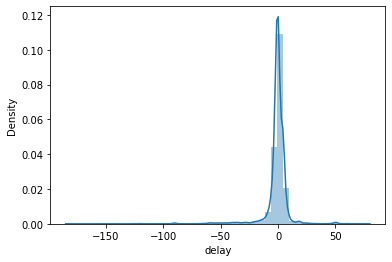

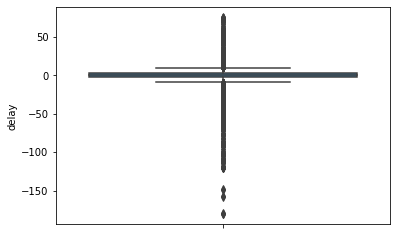

In [49]:
#checking for outliers in the target column
sns.distplot(y_train)
plt.show()
print()
sns.boxplot(y=y_train)
plt.show()

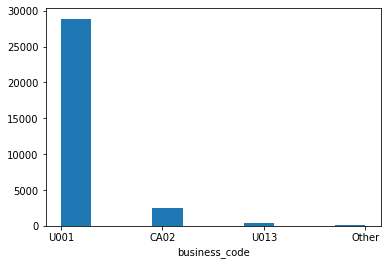

None


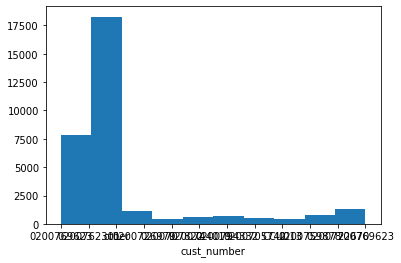

None


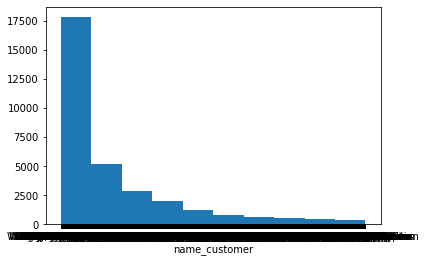

None


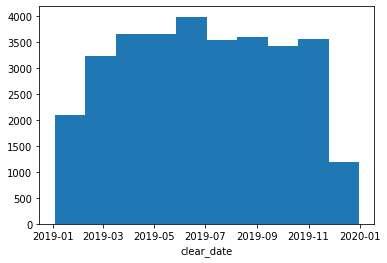

None


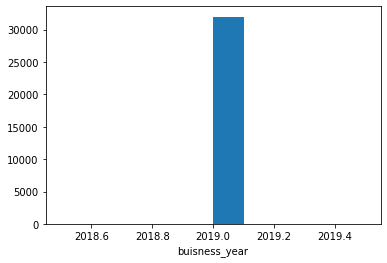

None


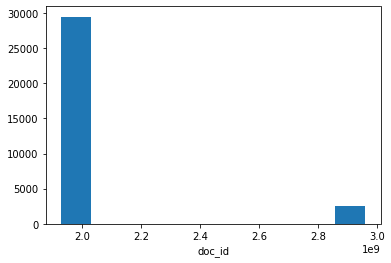

None


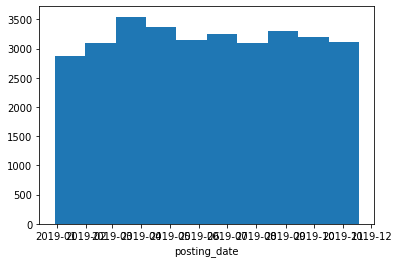

None


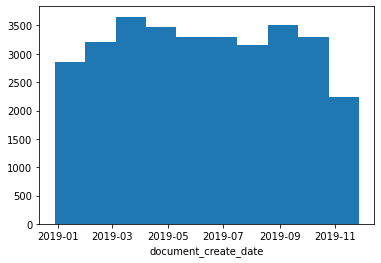

None


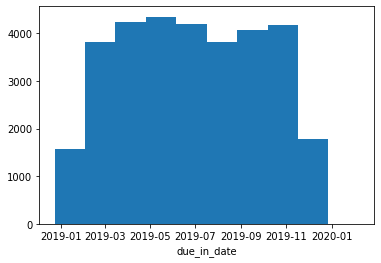

None


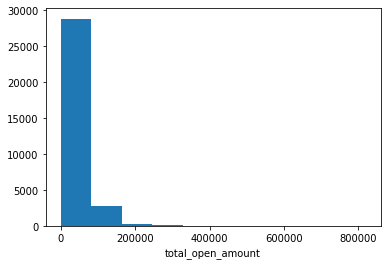

None


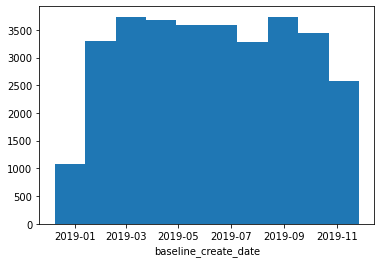

None


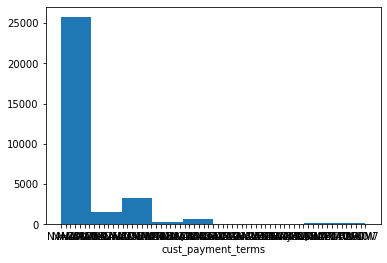

None


In [50]:
#ploting the numnerical columns
cols=list(x_train.describe().columns)
for i in cols:
  plt.hist(x_train[i])
  plt.xlabel(i)
  print(plt.show())

# Feature Engineering

### Changing the datatypes

In [51]:
#checking the dataypes of the columns
x_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                   object
doc_id                          object
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
total_open_amount               object
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

In [52]:
#function to change the datatype
def change_dtype(col ,typechg,train_1 = x_train,val_1 = x_val,test_1 = x_test):
    train_1[col]=train_1[col].astype(typechg)
    val_1[col]=val_1[col].astype(typechg)
    test_1[col]=test_1[col].astype(typechg)
    return train_1,val_1,test_1

In [53]:
#changing the datatypes of total_open_amount , buisness_year , doc_id columns
x_train,x_val,x_test = change_dtype('total_open_amount','float')
x_train,x_val,x_test = change_dtype('buisness_year','int')
x_train,x_val,x_test = change_dtype('doc_id','float')

In [54]:
#checking the dataypes of the columns
x_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

### Encoding and dropping the columns that are not needed


In [55]:
#importing the required library
from sklearn.preprocessing import LabelEncoder

In [56]:
#creating a function to drop columns
def dropcols(col ,train_1 = x_train,val_1 = x_val,test_1 = x_test):
    train_1.drop(col, axis =1,inplace=True)
    val_1.drop(col,axis=1 , inplace=True)
    test_1.drop(col,axis=1 , inplace=True)
    return train_1,val_1 ,test_1

In [57]:
#encoding the business_code column
encode = LabelEncoder()
encode.fit(x_train['business_code'])
x_train['business_code_enc'] = encode.transform(x_train['business_code'])
x_val['business_code_enc'] = encode.transform(x_val['business_code'])
x_test['business_code_enc'] = encode.transform(x_test['business_code'])

In [58]:
#droping the business_code column
x_train,x_val,x_test = dropcols('business_code')

In [59]:
#function to change date datype into integer
def date_separate(col ,train_1 = x_train,val_1 = x_val,test_1 = x_test):
    time=col+"_timestamp"
    train_1[time]=pd.to_numeric(train_1[col])
    val_1[time]=pd.to_numeric(test_1[col])
    test_1[time]=pd.to_numeric(test_1[col])
    return train_1,val_1,test_1

In [60]:
#changing all the date columns
cols=list(x_train.select_dtypes(include=['datetime64[ns]']).columns)
for i in cols:
  x_train,x_val,x_test = date_separate(i)
  x_train,x_val,x_test = dropcols(i)

In [61]:
#encoding the cust_payment_terms column and then droping the column
payment_term_encode = LabelEncoder()
payment_term_encode.fit(train['cust_payment_terms'])
x_train['payment_term_enc'] = payment_term_encode.transform(x_train['cust_payment_terms'])
x_val['payment_term_enc'] = payment_term_encode.transform(x_val['cust_payment_terms'])
x_test['payment_term_enc'] = payment_term_encode.transform(x_test['cust_payment_terms'])
x_train,x_val,x_test = dropcols('cust_payment_terms')

In [62]:
#column name_customer is no-relation to predict the delay so we can drop it
x_train,x_val,x_test = dropcols('name_customer')

In [63]:
x_train.dtypes #checking the datatypes

cust_number                        object
buisness_year                       int64
doc_id                            float64
total_open_amount                 float64
business_code_enc                   int64
clear_date_timestamp                int64
posting_date_timestamp              int64
document_create_date_timestamp      int64
due_in_date_timestamp               int64
baseline_create_date_timestamp      int64
payment_term_enc                    int64
dtype: object

In [64]:
#encoding the cust_payment_terms column and then droping the column
cust_numb_encode = LabelEncoder()
cust_numb_encode.fit(train['cust_number'])
x_train['cust_number_enc'] = cust_numb_encode.transform(x_train['cust_number'])
x_val['cust_number_enc'] = cust_numb_encode.transform(x_val['cust_number'])
x_test['cust_number_enc'] = cust_numb_encode.transform(x_test['cust_number'])
x_train,x_val,x_test = dropcols('cust_number')

### Removal of Quasi Constants


In [65]:
#checking the quasi-constant columns
sel=VarianceThreshold(threshold=0.1)
sel.fit(x_train)
quasi_constants=[x for x in x_train.columns if x not in x_train.columns[sel.get_support()]]
quasi_constants

['buisness_year']

In [66]:
for i in quasi_constants:
  x_train,x_val,x_test=dropcols(i)

In [67]:
#checking the dtypes of the columns
x_train.dtypes

doc_id                            float64
total_open_amount                 float64
business_code_enc                   int64
clear_date_timestamp                int64
posting_date_timestamp              int64
document_create_date_timestamp      int64
due_in_date_timestamp               int64
baseline_create_date_timestamp      int64
payment_term_enc                    int64
cust_number_enc                     int64
dtype: object

## Feature Selection


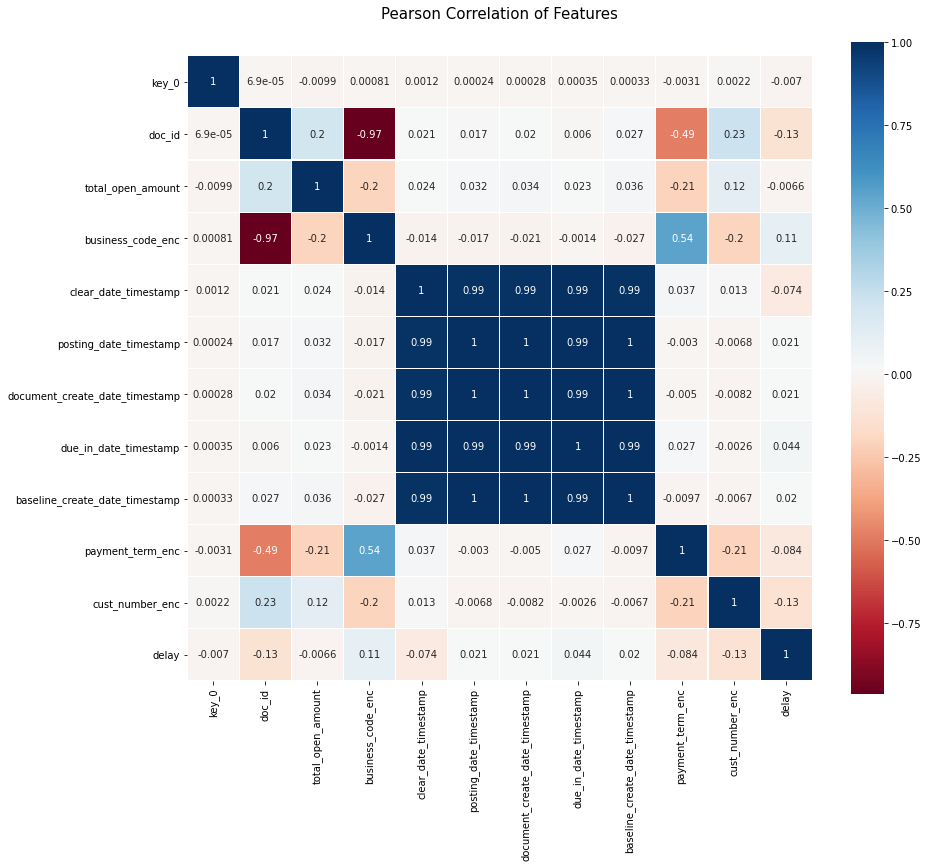

In [68]:
#predicting a heatmap
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [69]:
#importing the required libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor ,RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [70]:
#selecting the best features using Sequential-Feature-Selector
sfs=SFS(RandomForestClassifier(n_jobs=3),
        k_features=4,
        forward=True,
        floating=False,
        verbose=2,
        scoring='neg_mean_squared_error',
        cv=3
       )

In [71]:
#fitting the data
sfs=sfs.fit(np.array(x_train),y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.9min finished

[2021-06-28 14:56:37] Features: 1/4 -- score: -92.89128200904025[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.8min finished

[2021-06-28 14:59:25] Features: 2/4 -- score: -90.18139266322522[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.8min finished

[2021-06-28 15:02:14] Features: 3/4 -- score: -99.03486163443115[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [72]:
#fetching the selected features using Sequential-Feature-Selector
selected_feat=x_train.columns[list(sfs.k_feature_idx_)]
selected_feat=list(selected_feat)
print(selected_feat)

['total_open_amount', 'business_code_enc', 'payment_term_enc', 'cust_number_enc']


### Model Building


In [73]:
#importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,mean_squared_error

In [74]:
#creating  dataframes using the selected features
x_m_train=x_train.loc[:,selected_feat]
x_m_val=x_val.loc[:,selected_feat]
x_m_test=x_test.loc[:,selected_feat]

In [75]:
#model building using Logistic Regression
model1=LogisticRegression()
model1.fit(x_m_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
#validating the model1
model1_predict=model1.predict(x_m_val)
model1_rmse=mean_squared_error(y_val, model1_predict)

In [77]:
#model building using SVC
model2=SVC()
model2.fit(x_m_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
#validating the model2
model2_predict=model2.predict(x_m_val)
model2_rmse=mean_squared_error(y_val, model2_predict,squared=False)

In [79]:
#model building using Decision Tree
model3=DecisionTreeClassifier()
model3.fit(x_m_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
#validating the model3
model3_predict=model3.predict(x_m_val)
model3_rmse=mean_squared_error(y_val, model3_predict,squared=False)

In [81]:
#model building using KNN
model4=KNeighborsClassifier()
model4.fit(x_m_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
#validating the model4
model4_predict=model4.predict(x_m_val)
model4_rmse=mean_squared_error(y_val, model4_predict,squared=False)

In [83]:
#model building using Random Forest
model5=RandomForestClassifier()
model5.fit(x_m_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
#validating the model5
model5_predict=model5.predict(x_m_val)
model5_rmse=mean_squared_error(y_val, model5_predict,squared=False)

In [85]:
#model building using XGBoost
model6=XGBClassifier()
model6.fit(x_m_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [86]:
#validating the model6
model6_predict=model6.predict(x_m_val)
model6_rmse=mean_squared_error(y_val, model6_predict,squared=False)

In [87]:
#comparing all the models
data={'model_name':['Logistic Regression model','SVC model','Decision Tree Classifier model','K-Nearest Neighbor model','Random Forest Classifier model','XGBoost model'],
      'RMSE':[model1_rmse,model2_rmse,model3_rmse,model4_rmse,model5_rmse,model6_rmse]}
modelcom=pd.DataFrame(data)

In [88]:
#view the modelcom dataframe
modelcom.head(10)

,model_name,RMSE
0,Logistic Regression model,77.972493
1,SVC model,8.835073
2,Decision Tree Classifier model,9.964240
3,K-Nearest Neighbor model,12.537805
4,Random Forest Classifier model,9.588430
5,XGBoost model,7.733819


In [89]:
#XGBoost model is giving the minimum MSE so selecing that model
y_predict=model6.predict(x_m_test)
rmse=mean_squared_error(y_test,y_predict,squared=False)
mat = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])
print(f"The MSE of the model on the test data is {rmse}")

The MSE of the model on the test data is 9.730583230207735


In [90]:
#viewing the mat dataframe
mat.head()

,Predicted,Actuals
0,0,-5
1,0,0
2,0,0
3,0,7
4,1,13


### Predicting the test set


In [91]:
#Prediction on the missing data
#view the data
test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-11,2020-03-11,2020-03-26,USD,RV,1.0,NaN,50124.60,2020-03-11,NAH4,1.930638e+09,1
8,U001,0200759878,SA,NaT,2020.0,1.930730e+09,2020-04-03,2020-04-01,2020-04-03,2020-04-18,USD,RV,1.0,NaN,13603.02,2020-04-03,NAH4,1.930730e+09,1
9,U001,0200749225,SUPER foundation,NaT,2020.0,1.930718e+09,2020-03-30,2020-03-29,2020-03-30,2020-04-14,USD,RV,1.0,NaN,98963.00,2020-03-30,NAA8,1.930718e+09,1
19,U001,0200797984,PIGGLY us,NaT,2020.0,1.930598e+09,2020-03-05,2020-03-04,2020-03-05,2020-03-20,USD,RV,1.0,NaN,20573.78,2020-03-05,NAA8,1.930598e+09,1
25,U001,0200792734,MDV/ co,NaT,2020.0,1.930740e+09,2020-04-03,2020-04-03,2020-04-03,2020-04-18,USD,RV,1.0,NaN,25162.58,2020-04-03,NAA8,1.930740e+09,1


In [92]:
test.business_code.value_counts()

U001    9211
CA02     703
U013      60
U002      23
U005       3
Name: business_code, dtype: int64

In [93]:
#fetching the selcted features on which prediction is to be made
data=test.loc[:,['invoice_currency','total_open_amount','business_code','cust_number','cust_payment_terms']]
data.head()

,invoice_currency,total_open_amount,business_code,cust_number,cust_payment_terms
3,USD,50124.60,U001,0200769623,NAH4
8,USD,13603.02,U001,0200759878,NAH4
9,USD,98963.00,U001,0200749225,NAA8
19,USD,20573.78,U001,0200797984,NAA8
25,USD,25162.58,U001,0200792734,NAA8


In [94]:
#converting the curency
for i in range (len(data)):
        if data.iloc[i,0]=="CAD":
            data.iloc[i,1]= c.convert(data.iloc[i,1],'USD','CAD')
            data.invoice_currency='USD'

In [95]:
#looking at the different values and their frequencies
data.business_code.value_counts()

U001    9211
CA02     703
U013      60
U002      23
U005       3
Name: business_code, dtype: int64

In [96]:
#reseting the indexes
data=data.reset_index(drop=True)

In [97]:
#encoding the business_code
data['business_code'] = np.where(data['business_code'].isin(mask_obs_business_code)==False,"Other",data['business_code'])
data['business_code_enc'] = encode.transform(data['business_code'])
data.drop(columns=['business_code'],axis=1,inplace=True)

In [98]:
#encode the cust_payment_terms
payment_term_encode = LabelEncoder()
payment_term_encode.fit(test['cust_payment_terms'])
data['payment_term_enc'] = payment_term_encode.transform(data['cust_payment_terms'])
data.drop(columns=['cust_payment_terms'],axis=1,inplace=True)

In [99]:
#grouping some values of cust_number values
frequencies=data.cust_number.value_counts()
condition=frequencies<500
mask_obs=frequencies[condition].index
mask_dict=dict.fromkeys(mask_obs,'other')
data['cust_number']=data['cust_number'].replace(mask_dict)
data.cust_number.value_counts()

other         7376
0200769623    2624
Name: cust_number, dtype: int64

In [100]:
#encoding the cust_number
data['cust_number_enc'] = cust_numb_encode.transform(data['cust_number'])
data.drop(columns=['cust_number'],axis=1,inplace=True)

In [101]:
data.head()

,invoice_currency,total_open_amount,business_code_enc,payment_term_enc,cust_number_enc
0,USD,50124.60,2,27,6
1,USD,13603.02,2,27,11
2,USD,98963.00,2,12,11
3,USD,20573.78,2,12,11
4,USD,25162.58,2,12,11


In [102]:
#droping the invoice_currency column
data.drop(columns=['invoice_currency'],axis=1,inplace=True)

In [103]:
data.dtypes

total_open_amount    float64
business_code_enc      int64
payment_term_enc       int64
cust_number_enc        int64
dtype: object

In [104]:
#making the prediction
predict=model6.predict(data)

In [105]:
test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-11,2020-03-11,2020-03-26,USD,RV,1.0,NaN,50124.60,2020-03-11,NAH4,1.930638e+09,1
8,U001,0200759878,SA,NaT,2020.0,1.930730e+09,2020-04-03,2020-04-01,2020-04-03,2020-04-18,USD,RV,1.0,NaN,13603.02,2020-04-03,NAH4,1.930730e+09,1
9,U001,0200749225,SUPER foundation,NaT,2020.0,1.930718e+09,2020-03-30,2020-03-29,2020-03-30,2020-04-14,USD,RV,1.0,NaN,98963.00,2020-03-30,NAA8,1.930718e+09,1
19,U001,0200797984,PIGGLY us,NaT,2020.0,1.930598e+09,2020-03-05,2020-03-04,2020-03-05,2020-03-20,USD,RV,1.0,NaN,20573.78,2020-03-05,NAA8,1.930598e+09,1
25,U001,0200792734,MDV/ co,NaT,2020.0,1.930740e+09,2020-04-03,2020-04-03,2020-04-03,2020-04-18,USD,RV,1.0,NaN,25162.58,2020-04-03,NAA8,1.930740e+09,1


In [106]:
#merging into the dataframe
test=test.reset_index(drop=True)
predictiondf=test.merge(pd.Series(predict,name='delay') , on = test.index)

In [107]:
predictiondf.delay.min(),predictiondf.delay.max()

(-65, 30)

In [108]:
#converting the delay values in to days
predictiondf['delay']=pd.to_timedelta(predictiondf['delay'], unit='D')

In [109]:
#predicting the clear_date
predictiondf['clear_date']=predictiondf['due_in_date']-predictiondf['delay']

In [110]:
#view the final prediction dataframe 
predictiondf.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,0,U001,0200769623,WAL-MAR in,2020-03-26,2020.0,1.930638e+09,2020-03-11,2020-03-11,2020-03-11,2020-03-26,USD,RV,1.0,NaN,50124.60,2020-03-11,NAH4,1.930638e+09,1,0 days
1,1,U001,0200759878,SA,2020-04-18,2020.0,1.930730e+09,2020-04-03,2020-04-01,2020-04-03,2020-04-18,USD,RV,1.0,NaN,13603.02,2020-04-03,NAH4,1.930730e+09,1,0 days
2,2,U001,0200749225,SUPER foundation,2020-04-14,2020.0,1.930718e+09,2020-03-30,2020-03-29,2020-03-30,2020-04-14,USD,RV,1.0,NaN,98963.00,2020-03-30,NAA8,1.930718e+09,1,0 days
3,3,U001,0200797984,PIGGLY us,2020-03-22,2020.0,1.930598e+09,2020-03-05,2020-03-04,2020-03-05,2020-03-20,USD,RV,1.0,NaN,20573.78,2020-03-05,NAA8,1.930598e+09,1,-2 days
4,4,U001,0200792734,MDV/ co,2020-04-21,2020.0,1.930740e+09,2020-04-03,2020-04-03,2020-04-03,2020-04-18,USD,RV,1.0,NaN,25162.58,2020-04-03,NAA8,1.930740e+09,1,-3 days


In [111]:
#Bucketize the delay into the Ageing buckets
predictiondf['bins'] = pd.cut(x=(pd.to_numeric(predictiondf['delay'].dt.days,downcast='integer')), bins=[-float("inf"),-60,-45,-30,-15,0,15,30,45,60,float("inf")])
predictiondf.bins.value_counts()

(-15.0, 0.0]      9632
(15.0, 30.0]       206
(0.0, 15.0]        142
(-30.0, -15.0]      14
(-45.0, -30.0]       5
(-inf, -60.0]        1
(60.0, inf]          0
(45.0, 60.0]         0
(30.0, 45.0]         0
(-60.0, -45.0]       0
Name: bins, dtype: int64

In [112]:
#view the final prediction 
predictiondf.head(10)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,bins
0,0,U001,0200769623,WAL-MAR in,2020-03-26,2020.0,1.930638e+09,2020-03-11,2020-03-11,2020-03-11,2020-03-26,USD,RV,1.0,NaN,50124.60,2020-03-11,NAH4,1.930638e+09,1,0 days,"(-15.0, 0.0]"
1,1,U001,0200759878,SA,2020-04-18,2020.0,1.930730e+09,2020-04-03,2020-04-01,2020-04-03,2020-04-18,USD,RV,1.0,NaN,13603.02,2020-04-03,NAH4,1.930730e+09,1,0 days,"(-15.0, 0.0]"
2,2,U001,0200749225,SUPER foundation,2020-04-14,2020.0,1.930718e+09,2020-03-30,2020-03-29,2020-03-30,2020-04-14,USD,RV,1.0,NaN,98963.00,2020-03-30,NAA8,1.930718e+09,1,0 days,"(-15.0, 0.0]"
3,3,U001,0200797984,PIGGLY us,2020-03-22,2020.0,1.930598e+09,2020-03-05,2020-03-04,2020-03-05,2020-03-20,USD,RV,1.0,NaN,20573.78,2020-03-05,NAA8,1.930598e+09,1,-2 days,"(-15.0, 0.0]"
4,4,U001,0200792734,MDV/ co,2020-04-21,2020.0,1.930740e+09,2020-04-03,2020-04-03,2020-04-03,2020-04-18,USD,RV,1.0,NaN,25162.58,2020-04-03,NAA8,1.930740e+09,1,-3 days,"(-15.0, 0.0]"
5,5,U001,0200718130,SYSCO F,2020-03-19,2020.0,1.930569e+09,2020-02-28,2020-02-25,2020-02-28,2020-03-19,USD,RV,1.0,NaN,5129.79,2020-02-28,NAD1,1.930569e+09,1,0 days,"(-15.0, 0.0]"
6,6,U001,0200772670,ASSOCIAT us,2020-04-03,2020.0,1.930665e+09,2020-03-17,2020-03-17,2020-03-17,2020-04-01,USD,RV,1.0,NaN,52657.94,2020-03-17,NAU5,1.930665e+09,1,-2 days,"(-15.0, 0.0]"
7,7,U001,0200803720,DEC llc,2020-03-26,2020.0,1.930698e+09,2020-03-25,2020-03-25,2020-03-25,2020-03-26,USD,RV,1.0,NaN,13504.01,2020-03-16,NAM2,1.930698e+09,1,0 days,"(-15.0, 0.0]"
8,8,U001,0200759878,SA llc,2020-05-01,2020.0,1.930794e+09,2020-04-16,2020-04-16,2020-04-16,2020-05-01,USD,RV,1.0,NaN,6243.02,2020-04-16,NAH4,1.930794e+09,1,0 days,"(-15.0, 0.0]"
9,9,U001,0200742791,QUI corp,2020-03-29,2020.0,1.930606e+09,2020-03-11,2020-03-05,2020-03-11,2020-03-26,USD,RV,1.0,NaN,24822.86,2020-03-11,NAA8,1.930606e+09,1,-3 days,"(-15.0, 0.0]"


In [113]:
#Converting the final dataframe to a pickle file
predictiondf=predictiondf.iloc[:,1:]
predictiondf.to_pickle("predicted_data.pkl")